In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
class Model(nn.Module):
    
    def __init__(self,n,p,rho):
        super(Model,self).__init__()

        self.n = n
        self.p = p
        self.rho = rho
        self.nl = torch.tanh
        
        self.xhist = []
        self.yhist = []
        
        self.y = torch.randn(1)
        self.x = torch.randn(self.n)
        
        self.w_o = nn.Linear(self.n,1,bias=False)
        
        self.r = torch.empty(self.n,self.n).uniform_(-1,1)
        self.r[torch.rand(self.r.shape) > self.p] = 0
        
        max_eig = np.max(np.abs(np.linalg.eigvals(self.r.detach().numpy())))
        print('Maximum eigenvalue of initialized weight matrix: {}'.format(max_eig))
        self.r = self.r * (self.rho / max_eig)
        self.true_rho = np.max(np.abs(np.linalg.eigvals(self.r.detach().numpy())))
        print('Maximum eigenvalue of scaled weight matrix: {}'.format(self.true_rho))
        
    
    def forward(self):
        self.xhist.append(self.x.detach().numpy())
        self.yhist.append(self.y.detach().numpy())
        self.y = self.w_o(self.x)
        self.x = self.nl(torch.matmul(self.r,self.x))
        
        
        
    def plot_history(self,start=0,end=-1,**kwargs):
        fig,ax = plt.subplots(2,1,sharex=True)
        fig.set_figheight(5)
        fig.set_figwidth(15)
        xs = np.vstack(self.xhist)
        ys = np.asarray(self.yhist)
        ax[0].imshow(xs.T[:,start:end],cmap='inferno')
        ax[1].plot(ys[start:end])
        plt.show()
        
        

In [3]:
n, p, rho = 100, 0.3, 0.99
m = Model(n=n,p=p,rho=rho)

Maximum eigenvalue of initialized weight matrix: 3.317474126815796
Maximum eigenvalue of scaled weight matrix: 0.9900000095367432


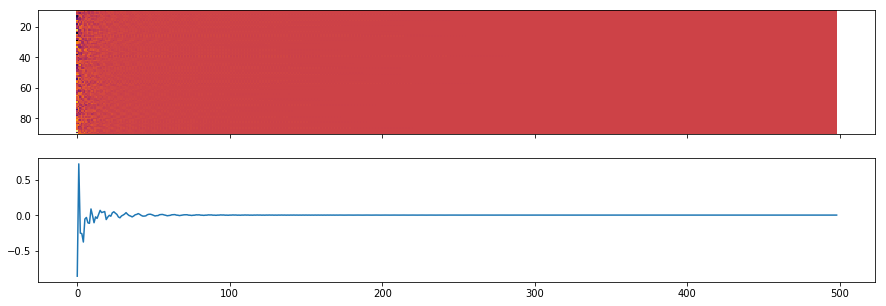

In [387]:
steps = 500
for s in range(steps):
    m.forward()
m.plot_history()

In [391]:
## Columns of individual neuron activation history
x = (np.vstack(m.xhist)).T

## Set each column vector mean to 0
for i in range(len(x)):
    avg = np.sum(x[i]) / len(x[i])
    x[i] = x[i] - avg

## Covariance matrix
covX = np.matmul(x.T,x)

## Sorted eigenvectors,values of covariance mat.
v, w = np.linalg.eig(covX)
idx = v.argsort()[::-1]   
v = v[idx]
w = w[:,idx]
print(np.shape(w))

num_features = 50
x = np.matmul(x, w)

plt.plot(x[1])
plt.set_figheight(5)
plt.set_figwidth(15)
plt.show()

(500, 500)


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_figheight'

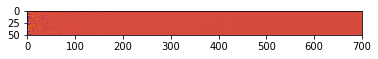